### Import libraries

In [2]:
import numpy as np                    # Scientific computing package
import pandas as pd                   # Working with dataframes
import matplotlib.pyplot as plt       # Plotting library
import os                             # File handling
import rasterio as rio                # Rasterio is a library for working with geospatial raster data
from rasterio.merge import merge      # For merging geotiff raster files

### Try out colormap plotting styles for geotiff Canopy Height Model 

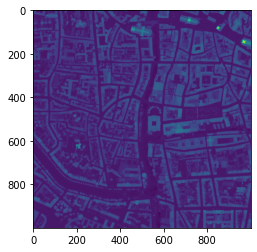

In [7]:
src = rio.open('/home/becode/AI/3dhouse/tile_chm_k22_134.tif')
plt.imshow(src.read(1), cmap='viridis')
plt.show()

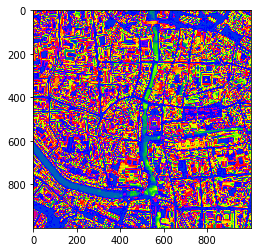

In [12]:
plt.imshow(src.read(1), cmap='prism')
plt.show()

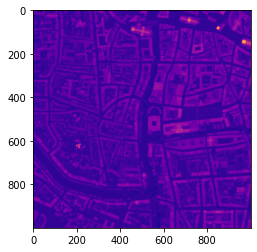

In [13]:
plt.imshow(src.read(1), cmap='plasma')
plt.show()

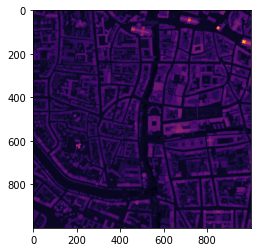

In [14]:
plt.imshow(src.read(1), cmap='inferno')
plt.show()

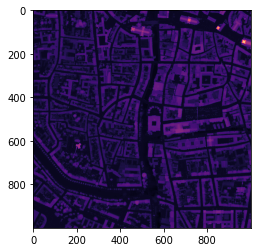

In [15]:
plt.imshow(src.read(1), cmap='magma')
plt.show()

### Plot 9 selected Geotiffs for city centre Ghent

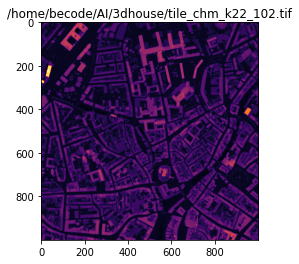

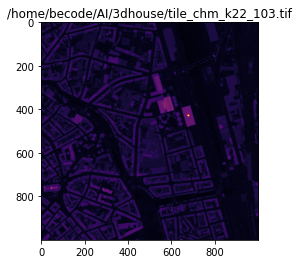

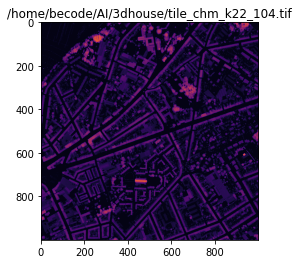

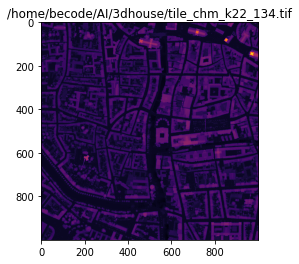

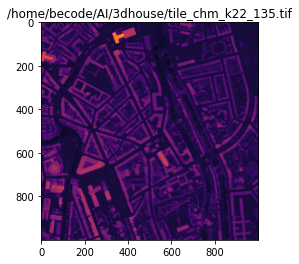

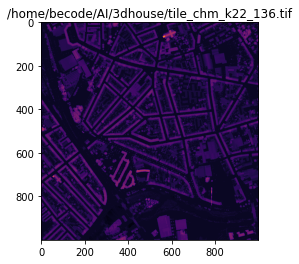

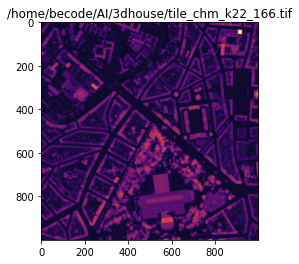

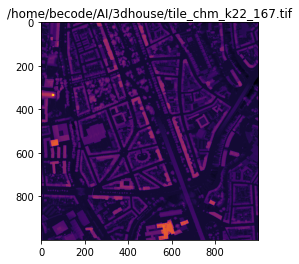

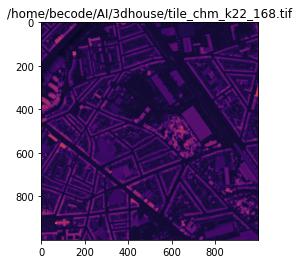

In [19]:
lst = ['tile_chm_k22_102.tif', 'tile_chm_k22_103.tif', 'tile_chm_k22_104.tif', 
                     'tile_chm_k22_134.tif', 'tile_chm_k22_135.tif', 'tile_chm_k22_136.tif',
                     'tile_chm_k22_166.tif', 'tile_chm_k22_167.tif', 'tile_chm_k22_168.tif']
for fp in lst:
    path = '/home/becode/AI/3dhouse/'
    filepath = os.path.join(path, fp)
    src = rio.open(filepath)
    plt.title(filepath)
    plt.imshow(src.read(1), cmap='inferno')
    plt.show()

### Merge 9 tif files into 1 raster file to make a nice image

Rasterio will do the merge based on meta data in tiff files and the coordinates. The files I selected make a 3x3 grid.

#### Add new filepath to CHM tif file name to open in Rasterio

In [4]:
files = ['tile_chm_k22_102.tif', 'tile_chm_k22_103.tif', 'tile_chm_k22_104.tif', 
                     'tile_chm_k22_134.tif', 'tile_chm_k22_135.tif', 'tile_chm_k22_136.tif',
                     'tile_chm_k22_166.tif', 'tile_chm_k22_167.tif', 'tile_chm_k22_168.tif']
to_mosaic = ['/home/becode/AI/3dhouse/' + item for item in files]
print(to_mosaic)

['/home/becode/AI/3dhouse/tile_chm_k22_102.tif', '/home/becode/AI/3dhouse/tile_chm_k22_103.tif', '/home/becode/AI/3dhouse/tile_chm_k22_104.tif', '/home/becode/AI/3dhouse/tile_chm_k22_134.tif', '/home/becode/AI/3dhouse/tile_chm_k22_135.tif', '/home/becode/AI/3dhouse/tile_chm_k22_136.tif', '/home/becode/AI/3dhouse/tile_chm_k22_166.tif', '/home/becode/AI/3dhouse/tile_chm_k22_167.tif', '/home/becode/AI/3dhouse/tile_chm_k22_168.tif']


#### Read in tif files in list to merge

In [5]:
src_files_to_mosaic = []
for fp in to_mosaic:
    src = rio.open(fp)
    src_files_to_mosaic.append(src)

src_files_to_mosaic

[<open DatasetReader name='/home/becode/AI/3dhouse/tile_chm_k22_102.tif' mode='r'>,
 <open DatasetReader name='/home/becode/AI/3dhouse/tile_chm_k22_103.tif' mode='r'>,
 <open DatasetReader name='/home/becode/AI/3dhouse/tile_chm_k22_104.tif' mode='r'>,
 <open DatasetReader name='/home/becode/AI/3dhouse/tile_chm_k22_134.tif' mode='r'>,
 <open DatasetReader name='/home/becode/AI/3dhouse/tile_chm_k22_135.tif' mode='r'>,
 <open DatasetReader name='/home/becode/AI/3dhouse/tile_chm_k22_136.tif' mode='r'>,
 <open DatasetReader name='/home/becode/AI/3dhouse/tile_chm_k22_166.tif' mode='r'>,
 <open DatasetReader name='/home/becode/AI/3dhouse/tile_chm_k22_167.tif' mode='r'>,
 <open DatasetReader name='/home/becode/AI/3dhouse/tile_chm_k22_168.tif' mode='r'>]

#### Actual merging and plot: shape after rasterio merge is (1,x,x) => remove first dimension to (x,x)

(1, 3000, 3000)
[[[9.479569   8.792519   0.9200001  ... 0.89000034 2.0499997  2.045     ]
  [8.911596   6.8499994  0.         ... 1.8800006  1.9400005  2.0500002 ]
  [3.2399998  0.         0.         ... 1.9700003  1.9000001  1.9500003 ]
  ...
  [0.         0.         0.         ... 7.080778   7.1006575  6.9850974 ]
  [0.         0.         0.         ... 6.942313   7.154458   7.258886  ]
  [0.         0.         0.         ... 7.131621   7.1356616  7.025375  ]]]
(3000, 3000)


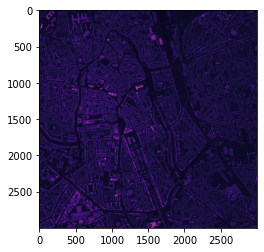

In [6]:
mosaic, out_trans = merge(src_files_to_mosaic)
print(mosaic.shape)
print(mosaic)
mosaic = mosaic[0,:,:]
print(mosaic.shape)
plt.imshow(mosaic, cmap='magma')
plt.savefig('stitchedCHMs.png')
plt.show()

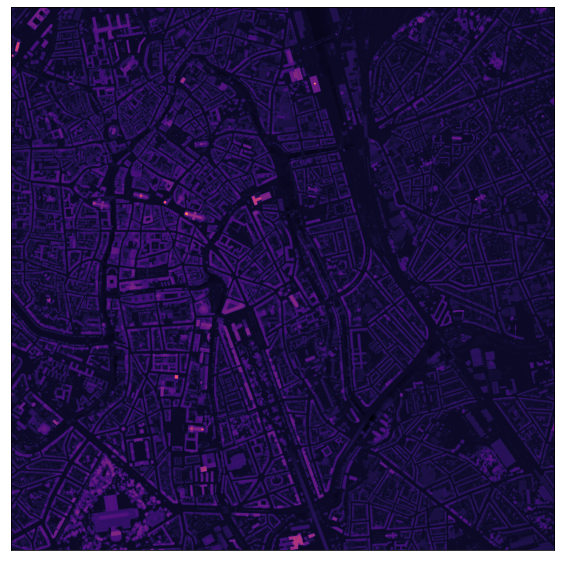

In [7]:
# without ticks
plt.figure(figsize=(10,10))
plt.imshow(mosaic, cmap='magma')
plt.yticks([])
plt.xticks([])
plt.savefig('stitchedCHMs.png')
plt.show()